In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('white')

In [2]:
# Abnm_ID=BTN-034
# HLA=HLA-A*33:03,...
infile = '/home/harald/projects/somatic/test_samples/hla_alleles/HLA_summary.txt'
x1, x2, x3, x4, x5 = [], [], [], [], []
tot_samples = []
tot_alleles = []
db = {}
with open(infile, 'r') as fin:
    for line in fin:
        if line.startswith('Abnm_ID'):
            sample = line.strip().split('=')[1]
            tot_samples.append(sample)
        elif line.startswith('HLA'):
            allele_list = line.strip().split('=')[1].split(',')
            db[sample] = allele_list
            for a in allele_list:
                tot_alleles.append(a)
                t1, t2 = a.strip("'").split('*')
                if t1.startswith('HLA'):
                    t1 = t1.split('-')[1]
                t3, t4 = t2.split(':')
                x1.append(sample)
                x2.append(t1)
                x3.append(t2)
                x4.append(t3)
                x5.append(t4)
tot_alleles_sort = sorted(list(set(tot_alleles)))
df = pd.DataFrame({'Sample':x1,'Gene':x2,'Allele':x3,'Field1':x4,'Field2':x5})

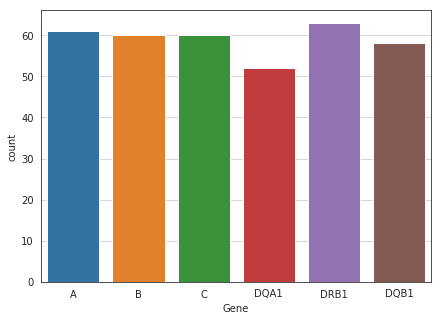

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7,5))
sns.countplot(x='Gene', data=df, ax=axes)
axes.grid(axis='y')
fig.savefig('HLA-alleles_distribution.png')

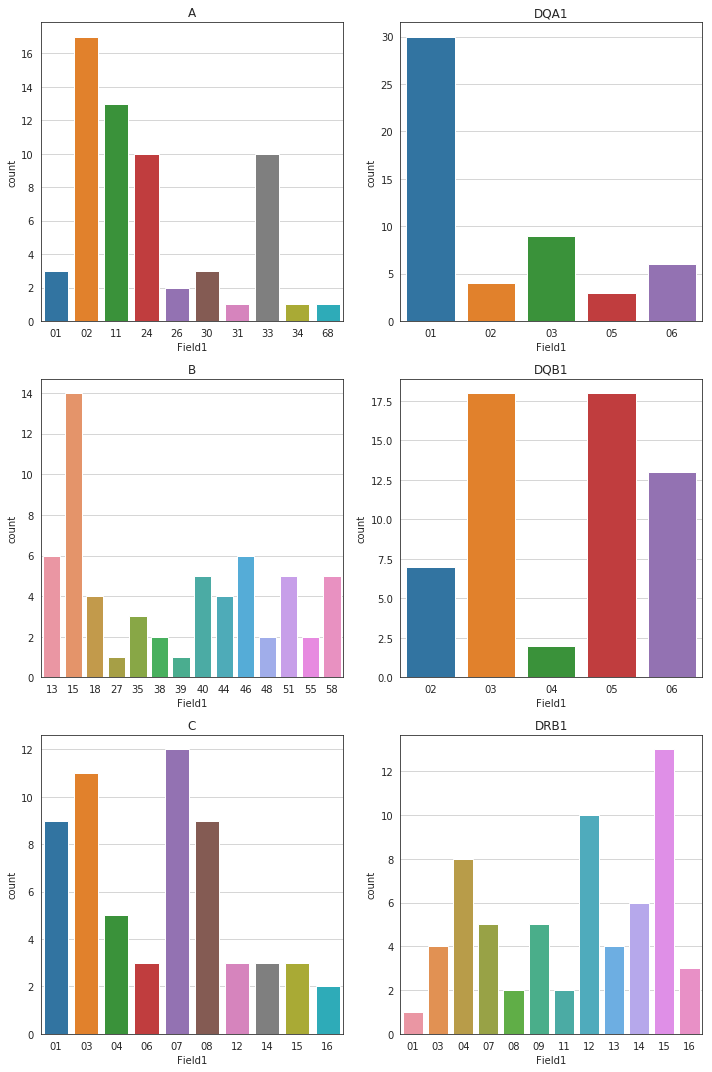

In [44]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,15))
genes = ['A','B','C','DQA1','DQB1','DRB1']
for i, gene in enumerate(genes):
    c = i // 3
    r = i % 3
    df1 = df[df['Gene']==gene]
    sns.countplot(x='Field1', data = df1, ax = axes[r,c])
    axes[r,c].set_title(gene)
    axes[r,c].grid(axis='y')
plt.tight_layout()
fig.savefig('HLA-alleles_distribution_gene.png')

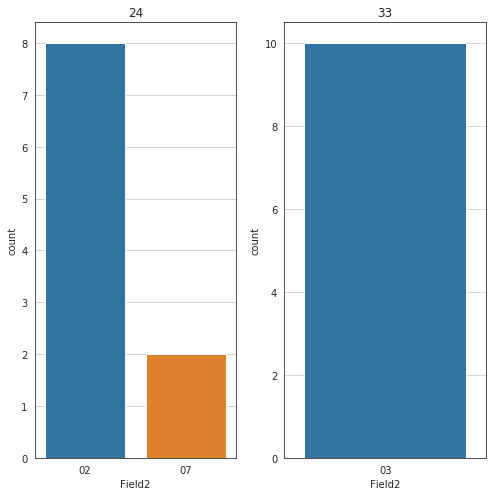

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,7))
gene = 'A'
fields = ['24', '33']
for i, field in enumerate(fields):
    df1 = df[(df['Gene']==gene) & (df['Field1'] == field)]
    sns.countplot(x='Field2', data = df1, ax = axes[i])
    axes[i].set_title(field)
    axes[i].grid(axis='y')
plt.tight_layout()
fig.savefig('HLA-alleles_distribution_loci.png')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 5 columns):
Sample    354 non-null object
Gene      354 non-null object
Allele    354 non-null object
Field1    354 non-null object
Field2    354 non-null object
dtypes: object(5)
memory usage: 13.9+ KB
